# TERCER INFORME DE ASTROMETRIA
#### Baracchi, Marcos. Gmail: marcos.baracchi@mi.unc.edu.ar

### **1_Introducción**

Debido a que las nuevas tecnologías aportan cantidades significativas de datos, se hace imperiosa la necesidad de almacenar los mismos de manera que su acceso sea eficiente y útil. En general, la información de grandes relevamientos, simulaciones numéricas, etc. está organizada en Bases de Datos. El paradigma más utilizado para organizar bases de datos es el de Base de Datos Relacional. En este tipo de modelo la información se organiza en tablas, que se relacionan entre sí a partir de una propiedad de los datos. Cada tabla es un conjunto de registros. Existen programas o sistemas de gestión de bases de datos relacionales. Entre los más conocidos, se destacan por ejemplo MySQL, PostgreSQL, Oracle y Microsoft SQL Server.


El **objetivo** de este trabajo es lograr una familiarización con el manejo de las bases de datos, pudiendo extraer información, procesar y analizar la misma con diferentes métodos y principios de probabilidad y estadística.

### **2_Datos y Resultados**   

En este informe vamos a realizar el manejo de bases de datos, el procesamiento y el analisis utilizando datos de exoplanetas, extraidos de la base de datos [exoplanetes.eu](http://exoplanet.eu/catalog/). Para esto nos vamos a conectar a un servidor utilizando la tarea *pyvo*, y vamos a descargar los datos que querramos usando lenguaje SQL.

In [1]:
import pyvo
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
import numpy as np

SERVIDOR: [PADC](http://voparis-tap-planeto.obspm.fr/tap),
[Informacion de las tabas](http://voparis-tap-planeto.obspm.fr/__system__/dc_tables/list/form).

In [2]:
service = pyvo.dal.TAPService("http://voparis-tap-planeto.obspm.fr/tap") # aca me conecto al servidor 

Aca voy a pedir que el valor de las masas $ < 15 $ masas de Jupyter, para considerar planetas y no enanas marrones. 

In [3]:
query = """SELECT obs_id,granule_uid,mass,period,semi_major_axis,
            star_spec_type,detection_type FROM exoplanet.epn_core 
            WHERE mass < 15"""

In [4]:
results = service.search(query) #pido que me busque en el servidor el query que yo quiero

In [5]:
results.table[:3] #visualizo la tabla

obs_id,granule_uid,mass,period,semi_major_axis,star_spec_type,detection_type
,,jupiterMass,d,AU,,
object,object,float64,float64,float64,object,object
77,14 Her b,9.1,1763.3,2.845,K0 V,Radial Velocity
309,14 Her c,6.9,52596.0,27.4,K0 V,Radial Velocity
501,1RXS 1609 b,14.0,--,330.0,K7V,Imaging


In [6]:
table = results.to_table() #aca uso un metodo que me crea una tabla de astropy

In [7]:
df = table.to_pandas() # aca llevo la tabla de astropy a un DataFrame de pandas
#df

In [8]:
df.set_index('granule_uid',inplace = True) #estoy reemplazando el indice por el nombre del planeta
df 

,obs_id,mass,period,semi_major_axis,star_spec_type,detection_type
granule_uid,,,,,,
14 Her b,77,9.10000,1763.300000,2.84500,K0 V,Radial Velocity
14 Her c,309,6.90000,52596.000000,27.40000,K0 V,Radial Velocity
1RXS 1609 b,501,14.00000,NaN,330.00000,K7V,Imaging
2M 0103-55 (AB) b,1321,13.00000,NaN,84.00000,M,Imaging
2M 0219-39 b,2400,13.90000,NaN,156.00000,M6,Imaging
...,...,...,...,...,...,...
pi Men b,83,12.60000,2088.330000,3.30800,G0V,Radial Velocity
pi Men c,6825,0.01142,6.267852,0.06702,G0V,Primary Transit
tau Boo A b,7,5.84000,3.312490,0.04600,F7 V,Radial Velocity


In [9]:
df.to_csv('datos.csv') #aca guardamos la tabla

#### **2.1_Ejercicio 6**   

Vamos a estudiar la distribucion de indices de masas y periodos orbitales para planetas descubiertos con diferentes
tecnicas observacionales y determine si existe un sesgo en las propiedades de los exoplanetas en funcion del tipo de
tecnica utilizada.

Vamos a crear sub tablas de la tabla original **df** de cada uno de los tipod de deteccion.

In [10]:
RV = df.loc[:, 'detection_type'] == 'Radial Velocity' # condicion 
df_RV = df.loc[RV]
df_RV.head()

,obs_id,mass,period,semi_major_axis,star_spec_type,detection_type
granule_uid,,,,,,
14 Her b,77,9.10000,1763.30000,2.84500,K0 V,Radial Velocity
14 Her c,309,6.90000,52596.00000,27.40000,K0 V,Radial Velocity
55 Cnc b,25,0.84000,14.65314,0.11339,K0IV-V,Radial Velocity
51 Peg b,12,0.47000,4.23080,0.05200,G2 IV,Radial Velocity
CD Cet b,7415,0.01244,2.29070,0.01850,M5.0,Radial Velocity


In [11]:
TRAN = df.loc[:, 'detection_type'] == 'Primary Transit'
df_TRAN = df.loc[TRAN]
IMA = df.loc[:, 'detection_type'] == 'Imaging'
df_IMA = df.loc[IMA]
Astrom = df.loc[:, 'detection_type'] == 'Astrometry'
df_Astrom = df.loc[Astrom]
ML = df.loc[:, 'detection_type'] == 'Microlensing'
df_ML = df.loc[ML]
Pulsar= df.loc[:, 'detection_type'] == 'Pulsar'
df_Pulsar = df.loc[Pulsar]
TTV = df.loc[:, 'detection_type'] == 'TTV'
df_TTV = df.loc[TTV]
Other = df.loc[:, 'detection_type'] == 'Other'
df_Other = df.loc[Other]

Primero vamos a hacer un grafico comparando los poridos contras las masas para cada una de las tecnicas.

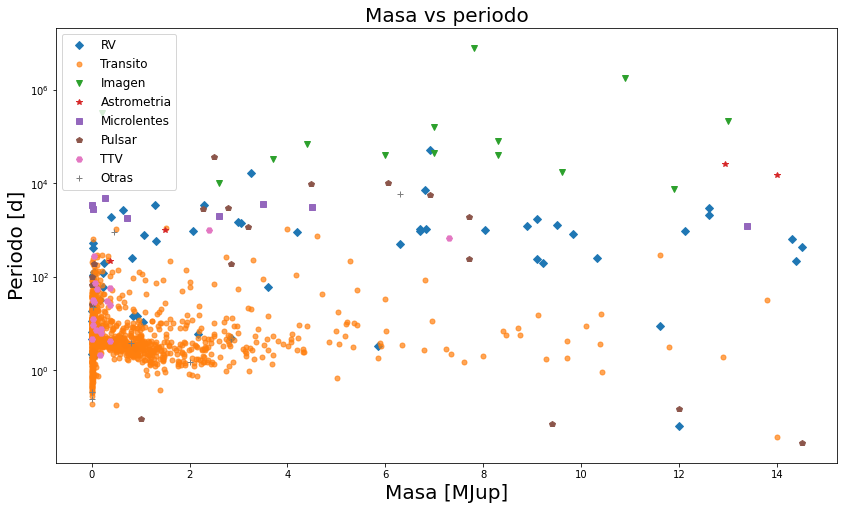

In [12]:
plt.figure(figsize=(14, 8))
plt.plot(df_RV['mass'],df_RV['period'],'D',label = 'RV')
plt.plot(df_TRAN['mass'],df_TRAN['period'],'o',label = 'Transito',alpha = 0.7,ms=5)
plt.plot(df_IMA['mass'],df_IMA['period'],'v',label = 'Imagen')
plt.plot(df_Astrom['mass'],df_Astrom['period'],'*',label = 'Astrometria')
plt.plot(df_ML['mass'],df_ML['period'],'s',label = 'Microlentes')
plt.plot(df_Pulsar['mass'],df_Pulsar['period'],'p',label = 'Pulsar')
plt.plot(df_TTV['mass'],df_TTV['period'],'H',label = 'TTV')
plt.plot(df_Other['mass'],df_Other['period'],'+',label = 'Otras')
plt.yscale('log')
plt.title('Masa vs periodo', fontsize=20)
plt.xlabel('Masa [MJup]', fontsize=20)
plt.ylabel('Periodo [d]', fontsize=20);
plt.legend(fontsize=12, loc='best')
plt.show()

Y ahora, vamos a ver las distibuciones de masas y periodos para cada una de las tecnicas

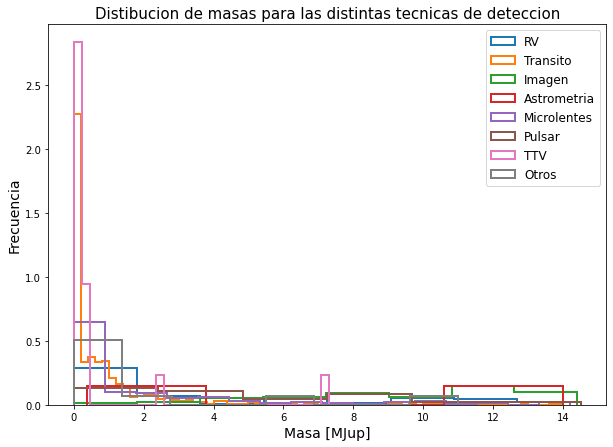

In [13]:
plt.figure(figsize=(10, 7))
plt.hist(df_RV['mass'],bins = 'auto',density = True,histtype ='step', label = 'RV',lw = 2)
plt.hist(df_TRAN['mass'],bins = 'auto',density = True,histtype ='step', label = 'Transito',lw = 2)
plt.hist(df_IMA['mass'],bins = 'auto',density = True,histtype ='step', label = 'Imagen',lw =2)
plt.hist(df_Astrom['mass'],bins = 'auto',density = True,histtype ='step', label = 'Astrometria',lw = 2)
plt.hist(df_ML['mass'],bins = 'auto',density = True,histtype ='step', label = 'Microlentes', lw = 2)
plt.hist(df_Pulsar['mass'],bins = 'auto',density = True,histtype ='step', label = 'Pulsar', lw = 2)
plt.hist(df_TTV['mass'],bins = 'auto',density = True,histtype ='step', label = 'TTV',lw = 2)
plt.hist(df_Other['mass'],bins = 'auto',density = True,histtype ='step',label = 'Otros',lw = 2)
plt.legend(fontsize=12, loc='best')
plt.title('Distibucion de masas para las distintas tecnicas de deteccion', fontsize=15)
plt.xlabel('Masa [MJup]', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

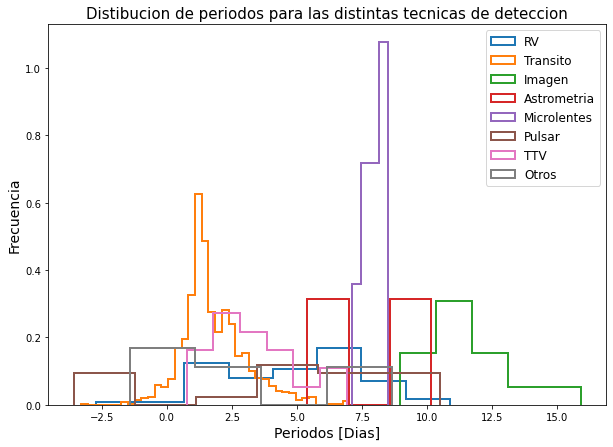

In [14]:
plt.figure(figsize=(10, 7))
plt.hist(np.log(df_RV['period']),bins = 'auto',density = True,histtype ='step', label = 'RV',lw = 2)
plt.hist(np.log(df_TRAN['period']),bins = 'auto',density = True,histtype ='step', label = 'Transito',lw = 2)
plt.hist(np.log(df_IMA['period']),bins = 'auto',density = True,histtype ='step', label = 'Imagen',lw =2)
plt.hist(np.log(df_Astrom['period']),bins = 'auto',density = True,histtype ='step', label = 'Astrometria',lw = 2)
plt.hist(np.log(df_ML['period']),bins = 'auto',density = True,histtype ='step', label = 'Microlentes', lw = 2)
plt.hist(np.log(df_Pulsar['period']),bins = 'auto',density = True,histtype ='step', label = 'Pulsar', lw = 2)
plt.hist(np.log(df_TTV['period']),bins = 'auto',density = True,histtype ='step', label = 'TTV',lw = 2)
plt.hist(np.log(df_Other['period']),bins = 'auto',density = True,histtype ='step',label = 'Otros',lw = 2)
plt.legend(fontsize=12, loc='best')
plt.title('Distibucion de periodos para las distintas tecnicas de deteccion', fontsize=15)
plt.xlabel('Periodos [Dias]', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

En los ultimos dos graficos podemos ver que **todas las tecnicas presentan sesgos**, en direferntes rangos tanto de masa como de periodo, ya que sino tendriamos que observar una distribucion similar tanto de masas como de periodo para todas las tecnicas de observacion.

#### **2.2 Ejercicio 7**

Ahora, vamos a estudiar la distribucion de distancias a las estrellas con exoplanetas y determinar si la misma es consistente
con una distribucion gaussiana. Para lo cual vamos a descargar los datos de la distancia y los vamos a unir con la tabla anterior.

In [15]:
query7 = "SELECT granule_uid,star_distance FROM exoplanet.epn_core WHERE mass < 15"
results7 = service.search(query7)

In [16]:
table7 = results7.to_table()
df7 = table7.to_pandas()
df7.set_index('granule_uid',inplace = True)
df7.head()

,star_distance
granule_uid,
14 Her b,18.1
14 Her c,18.1
1RXS 1609 b,145.0
2M 0103-55 (AB) b,47.2
2M 0219-39 b,39.4


In [25]:
#pd.merge?

In [17]:
DF = pd.merge(left = df,right=  df7,how ='inner',on ='granule_uid') # aca unimos las 2 tablas y la renumbramos como DF
DF.head()

,obs_id,mass,period,semi_major_axis,star_spec_type,detection_type,star_distance
granule_uid,,,,,,,
14 Her b,77,9.1,1763.3,2.845,K0 V,Radial Velocity,18.1
14 Her c,309,6.9,52596.0,27.400,K0 V,Radial Velocity,18.1
1RXS 1609 b,501,14.0,NaN,330.000,K7V,Imaging,145.0
2M 0103-55 (AB) b,1321,13.0,NaN,84.000,M,Imaging,47.2
2M 0219-39 b,2400,13.9,NaN,156.000,M6,Imaging,39.4


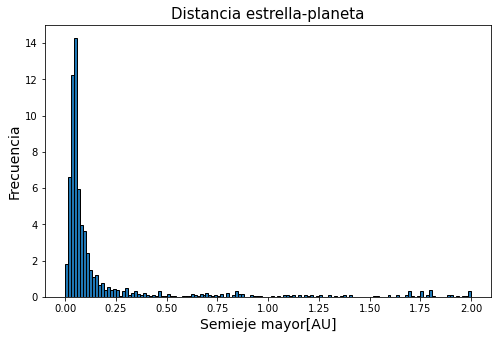

In [23]:
plt.figure(figsize=(8, 5))
plt.hist(DF['semi_major_axis'],range=[0,2],edgecolor = 'black',bins='auto',density = True)
plt.title('Distancia estrella-planeta',fontsize=15)
plt.xlabel("Semieje mayor[AU]",fontsize=14);plt.ylabel("Frecuencia",fontsize=14)
plt.show()

Y para ver si esta distribucion es consistente con una distribucion gaussiana vamos a utilizar la **Prueba de Kolmogórov-Smirnov**. De la cual vamos a obtener el *p-value* y vamos a ver si este es mayor a algun nivel de significancia dado, lo cual nos diria que no podriamos rechazar la hipotesis nula de que esta distribucion sea consistente con una distribucion gaussiana.

In [20]:
au = DF['semi_major_axis'][(DF['semi_major_axis']>0) & (DF['semi_major_axis']<=2)]

In [21]:
sp.kstest(au,'norm')

KstestResult(statistic=0.5017553403698662, pvalue=8.900347328192646e-270)

Aca podemos ver que no importa el nivel de significancia $ \alpha $ que tomemos, el valor de p va a ser menor. Por lo tanto, **se rechaza la hipostesis nula**.

#### **2.2 Ejercicio 8**

Ahora, vamos a realizar un grafico de las masas y los radios de los planetas, proponer un modelo y realizar  un ajuste de ese
modelo. Y por ultimo vamos a discutir el procedimiento para el ajuste del modelo.

Para lo cual vamos a descargar nuevamente del servidor los datos de los radios y los vamos a unir con la tabla anterior.

In [ ]:
query8 = "SELECT granule_uid,radius FROM exoplanet.epn_core WHERE mass < 15"
results8 = service.search(query8)
table8 = results8.to_table()
df8 = table8.to_pandas()
df8.set_index('granule_uid',inplace = True)

In [ ]:
DF8 = pd.merge(left = DF,right=  df8,how ='inner',on ='granule_uid')
DF8.head()

In [ ]:
DF8.to_csv('datos_finales.csv') # guardamos la tabla final 

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(DF8['mass'],DF8['radius'],'o',ms=3)
plt.xscale('log')
plt.yscale('log')
plt.title('Masas vs Radios',fontsize=15)
plt.xlabel("Masa[Mjup]",fontsize=14);plt.ylabel("Radio[Rjup]",fontsize=14)
plt.show()

Podemos ver apartir del grafico que podemos realizar un ajuste lineal a los datos utilizando la tarea *polyfit*, con la cual obtendremos los parametros del ajuste. Para ello, primero vamos a igualar la longitud de las tablas para lo cual las vamos a unir previamente habiendo sacado los valores que se encuentran en *NaN*, para que el ajuste no presente errores.

In [ ]:
x = DF8['mass'][~DF8['mass'].isna()]
y = DF8['radius'][~DF8['radius'].isna()]
DF8_1 = pd.merge(left = x,right= y,how ='inner',on ='granule_uid')
DF8_1.head()

In [ ]:
ajuste = np.polyfit(np.log(DF8_1['mass']),np.log(DF8_1['radius']),1) 
ajuste

Estos son los correspondientes valores de la pendiente y la ordenada al origen respectivamente.

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(np.log(DF8['mass']),np.log(DF8['radius']),'o',ms=3)
plt.title('Masas vs Radios',fontsize=15)
plt.xlabel("Masa[Mjup]",fontsize=14);plt.ylabel("Radio[Rjup]",fontsize=14)
t = np.linspace(-9,3,50)
plt.plot(t, ajuste[0]*t+ajuste[1],color = 'r')
plt.grid()

Con este ajuste, al estar los datos graficados en escala logaritmica conseguimos la siguiente relacion ente la masa y el radio: 

$$ \large \log(R) = a\log(M) + b $$

Donde a b lo puedo pensar como $ b = \log(c) $, con $ c = cte $.

Con lo que si despejamos la exprecion anterior nos queda una **relacion de potencias entre el radio y la masa**.

$$ \large R = c M^a $$ 

En este caso tenemos que $  a = 0.37 $ y $  c = 10^b = 0.86 $. El valor de $ a $ esta dentro de lo esperado, por que si pensaramos que todos los planetas tienen la misma densidad, la relacion entre el radio y la masa tendria que ser $ M \propto R^3 $, con lo cual el calor de $ c $ esta relacionado de alguna forma con el factor $ 4\pi\bar{\rho} $.

### **3_Conclusion** 

El uso de SQL junto con la biblioteca Pandas nos permiten tanto la obtencion como la manipulacion de datos de una manera sencilla y practica para poder posteriormente alanizarlos y extraer , como vimos el el ejercicio 8, modelos que nos relaciones diferentes caracteristicas/parametros de los objetos en cuestion.

Con respecto a los ejercicios realizados podemos decir que:
- Todas **las tecnicas de deteccion presentan sesgos** a la hora de calcular masas y periodos.
- La distribucion de distancias a estrellas con planetas **no** siguen una distribucion gaussiana.
- La relacion de masa-radio sigue una **ley de potencias**.